# K-means Clustering Evaluation
<br>
<p>K-nears komşu algoritması ile karıştırılmamalıdır.
k-, kümelemenin, başlangıçta sinyal işlemedengelen, n gözlemlerini, kümenin bir prototipi olarak hizmet veren, her gözlemin kümeye en yakın ortalamaya (küme merkezleri veya küme centroidi)ait olduğu k kümelerine bölmeyi amaçlayan bir vektör nicelemeyöntemi olduğu anlamına gelir. Bu, veri alanının Voronoi hücrelerinebölünmesiyle sonuçlanır. k-kümelemenin küme içindeki farkları en aza indirdiği anlamına gelir (kareli Öklid mesafeleri), ancak daha zor weber sorunuolacak normal Öklid mesafelerini değil : ortalama kare hataları optimize ederken, yalnızca geometrik ortanca Öklid mesafelerini en aza indirir. Örneğin, k-medianlar ve k-medoidler kullanılarak daha iyi Öklid çözümleri bulunabilir.</p>
<br>
<img src="img/k-means.png" alt="k-algoritma" width="500" height="600">
<img src="img/k-algoritma.png" alt="k-algoritma" width="500" height="600">
<img src="img/k-elbow.png" alt="k-algoritma" width="800" height="600">

In [3]:
# k-means calculating with python
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [22]:
# create dataset

# class 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)

In [7]:
data.head()

,x,y
0,23.467196,22.166928
1,15.915251,24.990503
2,26.346059,28.350468
3,29.519408,22.718579
4,23.879171,35.132810


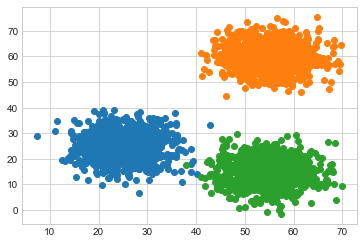

In [9]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

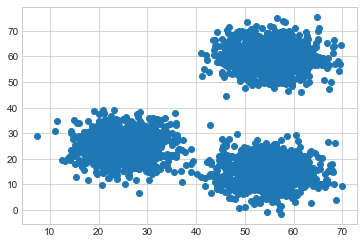

In [11]:
plt.scatter(data.x,data.y)
plt.show()

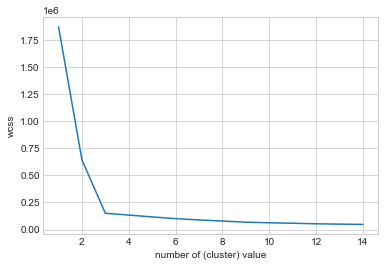

In [12]:
# k-means
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel("number of (cluster) value")
plt.ylabel("wcss")
plt.show()

In [14]:
# k = 3 for model
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)
data["label"] = clusters

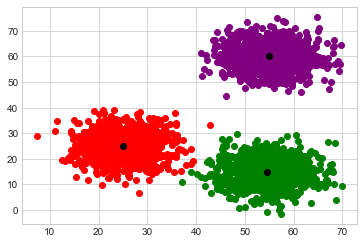

In [20]:
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="purple")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="green")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="black")
plt.show()

# Hierarcical Clustering
<br>
<p>Hangi kümelerin birleştirilmesi gerektiğine (toplayıcı için) veya bir kümenin nerede bölüneceğine (bölücü için) karar vermek için, gözlem kümeleri arasındaki bir farklılık ölçüsü gereklidir. Hiyerarşik kümelemenin çoğu yönteminde bu, uygun bir metrik (gözlem çiftleri arasındaki mesafenin bir ölçüsü) ve kümelerdeki gözlemlerin ikili mesafelerinin bir fonksiyonu olarak kümelerin farklılığını belirten bir bağlantı kriteri kullanılarak elde edilir.</p>
<br>
<img src="img/hierarcical-cluster.png" alt="h-c" width="800" height="800">
<br>
<p>Dendrogram, bir ağacı temsil eden bir diyagramdır. Bu şematik gösterim, sıklıkla farklı bağlamlarda kullanılır:

+ hiyerarşik kümelemede, ilgili analizler tarafından üretilen kümelerin düzenini gösterir.[4]
+ hesaplamalı biyolojide, bazen ısı haritalarının kenarlarında genlerin veya örneklerin kümelenmesini gösterir.
+ filogenetikte, çeşitli biyolojik taksonlar arasındaki evrimsel ilişkileri gösterir. Bu durumda dendrograma filogenetik ağaç da denir.[6]
    
Dendrogram adı, "ağaç" anlamına gelen δένδρον (déndron) ve "çizim, matematiksel şekil" anlamına gelen γράμμα (gramma) olmak üzere iki eski Yunanca sözcükten türemiştir.[7][8]</p>

<img src="img/dendogram.png" alt="h-c" width="800" height="800">

In [27]:
# create dataset

# class 1
x1 = np.random.normal(25,5,100)
y1 = np.random.normal(25,5,100)

# class 2
x2 = np.random.normal(55,5,100)
y2 = np.random.normal(60,5,100)

# class 3
x3 = np.random.normal(55,5,100)
y3 = np.random.normal(15,5,100)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}
data1 = pd.DataFrame(dictionary)

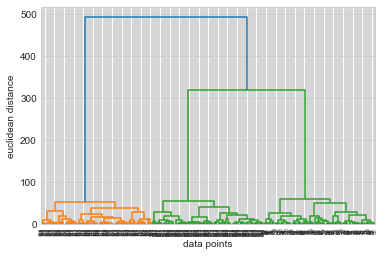

In [31]:
# k-means data with for hierarcical 
from scipy.cluster import hierarchy

merg = hierarchy.linkage(data1,method="ward")
hierarchy.dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

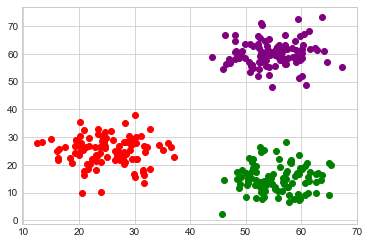

In [34]:
# H_C
from sklearn.cluster import AgglomerativeClustering

h_c = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster = h_c.fit_predict(data1)

data1["label"] = cluster

plt.scatter(data1.x[data1.label == 0],data1.y[data1.label == 0],color="red")
plt.scatter(data1.x[data1.label == 1],data1.y[data1.label == 1],color="purple")
plt.scatter(data1.x[data1.label == 2],data1.y[data1.label == 2],color="green")

plt.show()